In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import sys
%matplotlib inline

# Parte I

In [2]:
df = pd.read_csv('titanic_MD.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",?,38.0,1.0,0.0,PC 17599,71.2833,C85,C
1,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,C123,S
2,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0.0,0.0,17463,51.8625,E46,S
3,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,NaN,1.0,NaN,PP 9549,16.7000,G6,S
4,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,NaN,0.0,113783,26.5500,C103,S


# Análisis Inicial
Vemos que casi un 70% de los pasajeros sobrevivieron el accidente. La edad promedio de los pasajeros es de 35 años.

In [3]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,183.000000,183.000000,183.000000,158.000000,180.000000,171.000000,175.000000
mean,455.366120,0.672131,1.191257,35.692532,0.461111,0.461988,78.959191
std,247.052476,0.470725,0.515187,15.640858,0.646122,0.753435,77.026328
min,2.000000,0.000000,1.000000,0.920000,0.000000,0.000000,0.000000
25%,263.500000,0.000000,1.000000,24.000000,0.000000,0.000000,29.700000
50%,457.000000,1.000000,1.000000,35.500000,0.000000,0.000000,56.929200
75%,676.000000,1.000000,1.000000,48.000000,1.000000,1.000000,90.539600
max,890.000000,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200


# Filas con NA's

In [4]:
df.isna().sum() 

PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age            25
SibSp           3
Parch          12
Ticket          0
Fare            8
Cabin           0
Embarked       12
dtype: int64

In [5]:
np.unique(df['Sex'])

array(['?', 'female', 'male'], dtype=object)

In [6]:
cols = []
val = []
for col in df.select_dtypes(include='object').columns:
    cols.append(col)
    val.append(df[col].str.contains(r'\?').sum())
pd.DataFrame({
    'cols':cols,
    'val':val
})

,cols,val
0,Name,0
1,Sex,51
2,Ticket,0
3,Cabin,0
4,Embarked,0


In [7]:
df.replace(r'\?', np.nan, regex = True, inplace = True)

In [8]:
df.isna().sum()

PassengerId     0
Survived        0
Pclass          0
Name            0
Sex            51
Age            25
SibSp           3
Parch          12
Ticket          0
Fare            8
Cabin           0
Embarked       12
dtype: int64

**PassengerId:** simplemente se refiere al código unico de cada pasajero abordo del barco. &nbsp;

**Survived:** identifica como *0* a los que no sobrevivieron, y con *1* a los que sobrevivieron. &nbsp;

**Pclass:** *1* los de primera clase, *2* los de segunda/media clase, y *3* los de clase baja. &nbsp;

**Name:** nombre del pasajero. &nbsp;

**Sex:** sexo del pasajero, *male*, *female* o en el dataset original se encontraban unos *?* . Ya que la variable es categórica, inicialmente propongo que el missing data puede manejarse por medio de sectorized imputation, tomando el metodo de **ffill** que toma el último valor conocido y se lo coloca al siguiente missing value. &nbsp;

**Age:** la edad del pasajero. Si la columna se comporta de manera normal podremos aplicarle el método de sustituir los missing values con la *media*, en cambio si la data tiene un poco de sesgo, podemos reemplazar los valores con la *mediana*. &nbsp;

**Sibsp:** se refiere al número de hermanos/hermanas o esposas que llevaba el pasajero. Probablemente la variable dependa de la clase en la que el pasajero viaja, por lo tanto propondría reemplazar los missing values con la *moda o mediana*. &nbsp;

**Parch:** se refiere al número de hijos o papás abordo del barco. De la misma manera que la variable *Sibsp*, reemplazaría los valores por medio de *moda o mediana*. &nbsp;

**Ticket:** el número/código de identificación del ticket de cada pasajero. &nbsp;

**Fare:** se refiere al monto pagado por el viaje. Es probable que se encuentre sesgada la data dado a que existen 3 tipos de clase en los cuales varia mucho el *fare*. Reemplazaría los missing values con la *mediana* &nbsp;

**Cabin:** la cabina que se va a alojar el pasajero. &nbsp;

**Embarked:** el puerto donde embarcaron. Así mismo como la variable *Sex*, reemplazaría los valores por medio de sectorized imputations con el método de *ffill*. (C = Cherbourg; Q = Queenstown; S = Southampton)


# Dealing with Missing Values Methods

## Listwise

In [9]:
df_listwise = df.copy()
df_listwise = df_listwise.dropna()
df_listwise.shape

(100, 12)

### Filas completas

In [10]:
rows1 = len(df_listwise)
rows2 = len(df)
result = rows1/rows2
result

0.546448087431694

Solo 100 columnas del dataset se encuentran completas / 54% del dataset está completo

# Pairwise

In [11]:
df_pw = df.copy()
df_pw.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,183.000000,183.000000,183.000000,158.000000,180.000000,171.000000,175.000000
mean,455.366120,0.672131,1.191257,35.692532,0.461111,0.461988,78.959191
std,247.052476,0.470725,0.515187,15.640858,0.646122,0.753435,77.026328
min,2.000000,0.000000,1.000000,0.920000,0.000000,0.000000,0.000000
25%,263.500000,0.000000,1.000000,24.000000,0.000000,0.000000,29.700000
50%,457.000000,1.000000,1.000000,35.500000,0.000000,0.000000,56.929200
75%,676.000000,1.000000,1.000000,48.000000,1.000000,1.000000,90.539600
max,890.000000,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200


Python al momento de hacer análisis estadístico ya usa el método de pairwise, donde al hacer los cálculos simplemente omite los missing values.

# Imputation

In [12]:
from scipy import stats
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import explained_variance_score

In [13]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
imp_mode = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

In [14]:
df_mean = df.copy()
df_mean['Age'] = imp_mean.fit_transform(df_mean[['Age']])
df_mean['SipSp'] = imp_mean.fit_transform(df_mean[['SibSp']])
df_mean['Parch'] = imp_mean.fit_transform(df_mean[['Parch']])
df_mean['Fare'] = imp_mean.fit_transform(df_mean[['Fare']])

In [15]:
df_median = df.copy()
df_median['Age'] = imp_median.fit_transform(df_median[['Age']])
df_median['SipSp'] = imp_median.fit_transform(df_median[['SibSp']])
df_median['Parch'] = imp_median.fit_transform(df_median[['Parch']])
df_median['Fare'] = imp_median.fit_transform(df_median[['Fare']])

In [16]:
df_mode = df.copy()
df_mode['Age'] = imp_mode.fit_transform(df_mode[['Age']])
df_mode['SipSp'] = imp_mode.fit_transform(df_mode[['SibSp']])
df_mode['Parch'] = imp_mode.fit_transform(df_mode[['Parch']])
df_mode['Fare'] = imp_mode.fit_transform(df_mode[['Fare']])

# Sectorized Imputations

## Ages Column

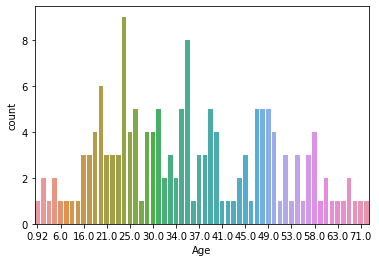

In [17]:
dic_ages = df.copy()
dic_ages = pd.DataFrame(df.groupby(['Pclass', 'Survived'])['Age'].agg(lambda x:x.value_counts().index[0])) \
    .reset_index()
dic_ages.columns = ['Pclass', 'Survived', 'Age_Result']
df_ages_new = df.copy()
df_ages_new = df_ages_new.merge(dic_ages, how = 'left', on = ['Pclass', 'Survived'])
df_ages_new['Age_Result_New'] = np.where(df['Age'].isna(), df_ages_new['Age_Result'], df['Age'])
df_ages_new['Age'] = pd.Categorical(df_ages_new.Age)
age_graph = sns.countplot(df[df['Age'].notna()]['Age'])
age_graph.xaxis.set_major_locator(ticker.MultipleLocator(4))

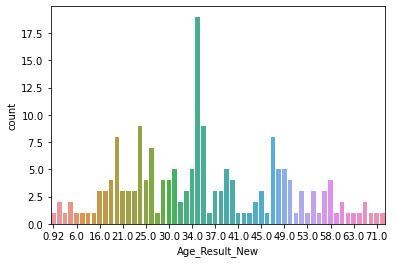

In [18]:
age_graph = sns.countplot(df_ages_new['Age_Result_New'])
age_graph.xaxis.set_major_locator(ticker.MultipleLocator(4))

## Sex

<AxesSubplot:xlabel='Sex', ylabel='count'>

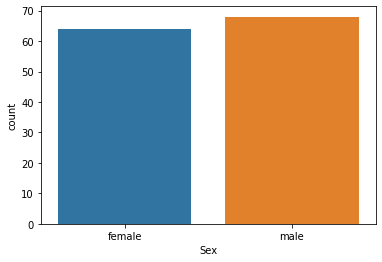

In [19]:
dic_sex = df.copy()
dic_sex = pd.DataFrame(df.groupby(['Pclass', 'Survived'])['Sex'].agg(lambda x:x.value_counts().index[0])) \
    .reset_index()
dic_sex.columns = ['Pclass', 'Survived', 'Sex_Result']
df_sex_new = df.copy()
df_sex_new = df_sex_new.merge(dic_sex, how = 'left', on = ['Pclass', 'Survived'])
df_sex_new['Sex_Result_New'] = np.where(df['Sex'].isna(), df_sex_new['Sex_Result'], df['Sex'])
sns.countplot(df[df['Sex'].notna()]['Sex'])

<AxesSubplot:xlabel='Sex_Result_New', ylabel='count'>

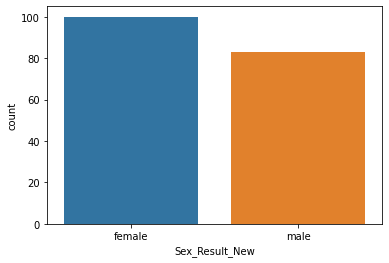

In [20]:
sns.countplot(df_sex_new['Sex_Result_New'])

## SibSp

<AxesSubplot:xlabel='SibSp', ylabel='count'>

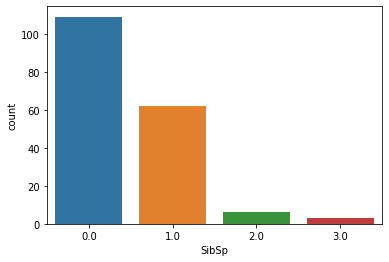

In [21]:
dic_sp = df.copy()
dic_sp = pd.DataFrame(df.groupby(['Pclass', 'Survived'])['SibSp'].agg(lambda x:x.value_counts().index[0])) \
    .reset_index()
dic_sp.columns = ['Pclass', 'Survived', 'SibSp_Result']
df_SibSp_new = df.copy()
df_SibSp_new = df_SibSp_new.merge(dic_sp, how = 'left', on = ['Pclass', 'Survived'])
df_SibSp_new['SibSp_Result_New'] = np.where(df['SibSp'].isna(), df_SibSp_new['SibSp_Result'], df['SibSp'])
sns.countplot(df[df['SibSp'].notna()]['SibSp'])

<AxesSubplot:xlabel='SibSp_Result_New', ylabel='count'>

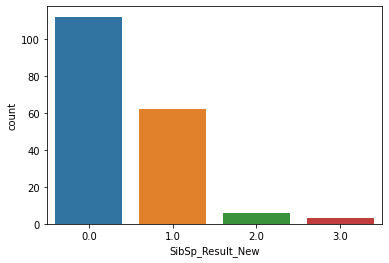

In [22]:
sns.countplot(df_SibSp_new['SibSp_Result_New'])

No hubo mucho cambio a comparación del dataset original, ya que solo eran 3 valores missing presentes.

<AxesSubplot:xlabel='Parch', ylabel='count'>

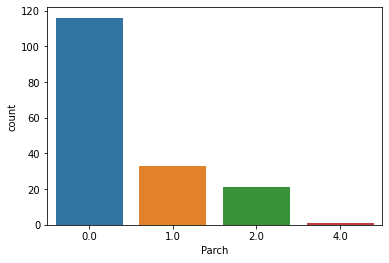

In [23]:
dic_parch = df.copy()
dic_parch = pd.DataFrame(df.groupby(['Pclass', 'Survived'])['Parch'].agg(lambda x:x.value_counts().index[0])) \
    .reset_index()
dic_parch.columns = ['Pclass', 'Survived', 'Parch_Result']
df_Parch_new = df.copy()
df_Parch_new = df_Parch_new.merge(dic_parch, how = 'left', on = ['Pclass', 'Survived'])
df_Parch_new['Parch_Result_New'] = np.where(df['Parch'].isna(), df_Parch_new['Parch_Result'], df['Parch'])
sns.countplot(df[df['Parch'].notna()]['Parch'])

<AxesSubplot:xlabel='Parch_Result_New', ylabel='count'>

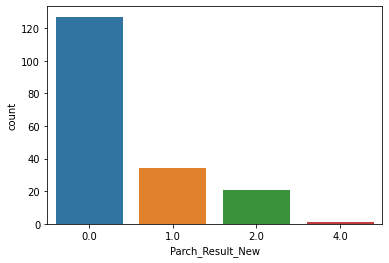

In [24]:
sns.countplot(df_Parch_new['Parch_Result_New'])

## Fare

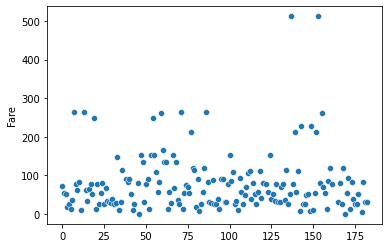

In [25]:
dic_fare = df.copy()
dic_fare = pd.DataFrame(df.groupby(['Pclass', 'Survived'])['Fare'].agg(lambda x:x.value_counts().index[0])) \
    .reset_index()
dic_fare.columns = ['Pclass', 'Survived', 'Fare_Result']
df_Fare_new = df.copy()
df_Fare_new = df_Fare_new.merge(dic_fare, how = 'left', on = ['Pclass', 'Survived'])
df_Fare_new['Fare_Result_New'] = np.where(df['Fare'].isna(), df_Fare_new['Fare_Result'], df['Fare'])
fare_graph = sns.scatterplot(x = df.index, y = 'Fare', data=df)
#fare_graph = sns.countplot(df[df['Fare'].notna()]['Fare'])
#plt.show()

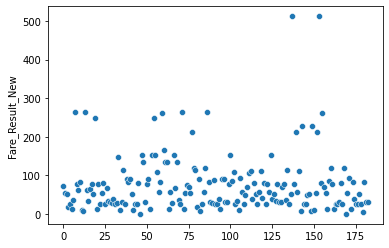

In [26]:
fare_graph = sns.scatterplot(x = df_Fare_new.index, y = 'Fare_Result_New', data=df_Fare_new)

## Embarked 

In [27]:
dic_embarked = df.copy()
dic_embarked = pd.DataFrame(df.groupby(['Pclass', 'Survived'])['Embarked'].agg(lambda x:x.value_counts().index[0])) \
    .reset_index()
dic_embarked.columns = ['Pclass', 'Survived', 'Embarked_Result']
dic_embarked 

,Pclass,Survived,Embarked_Result
0,1,0,S
1,1,1,S
2,2,0,S
3,2,1,S
4,3,0,S
5,3,1,S


<AxesSubplot:xlabel='Embarked', ylabel='count'>

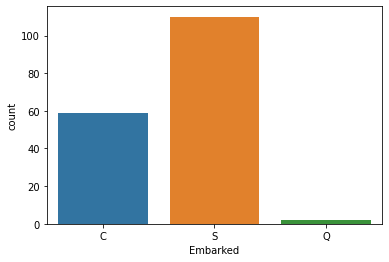

In [28]:
df_Embarked_new = df.copy()
df_Embarked_new = df_Embarked_new.merge(dic_embarked, how = 'left', on = ['Pclass', 'Survived'])
df_Embarked_new['Embarked_Result_New'] = np.where(df['Embarked'].isna(), df_Embarked_new['Embarked_Result'], \
                                                  df['Embarked'])
sns.countplot(df[df['Embarked'].notna()]['Embarked'])

<AxesSubplot:xlabel='Embarked_Result_New', ylabel='count'>

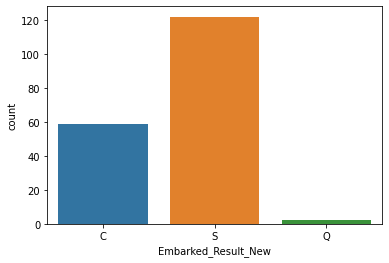

In [29]:
sns.countplot(df_Embarked_new['Embarked_Result_New'])

# Modelo Regresión Lineal Simple

### Fare

Fare average without prediction: 79


<AxesSubplot:xlabel='Fare', ylabel='Density'>

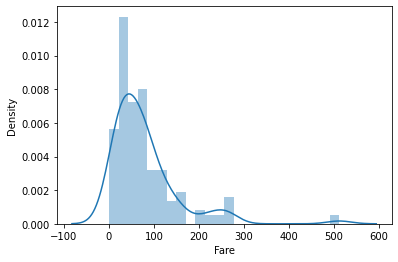

In [31]:
lm = LinearRegression()
lm = lm.fit(df_listwise[['Pclass']], df_listwise['Fare'])
df_lr_Fare = df.copy()
df_lr_Fare['Fare_lm'] = lm.predict(df[['Pclass']])
df_lr_Fare['Fare_lm'] = np.where(df_lr_Fare['Fare_lm'] < 0, 0, df_lr_Fare['Fare_lm'])
print('Fare average without prediction:', round(df['Fare'].mean()))
sns.distplot(df['Fare']) 

Fare after prediction: 73.54
y_hat = 127.46 + -45.7x


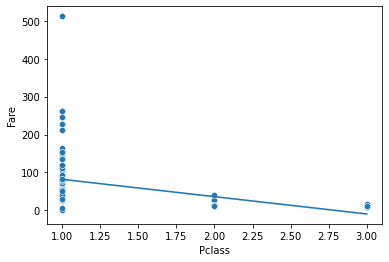

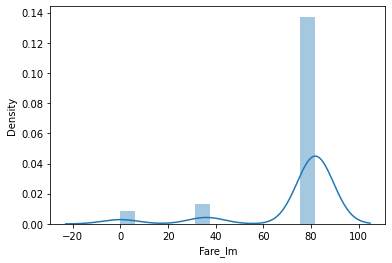

In [32]:
print('Fare after prediction:', round(df_lr_Fare['Fare_lm'].mean(),2))
print('y_hat = ', round(lm.intercept_,2), ' + ', round(lm.coef_[0],2), 'x', sep = '')
sns.scatterplot(x = df['Pclass'], y = df['Fare'])
sns.lineplot(x = df['Pclass'], y = lm.intercept_ + (lm.coef_ * df['Pclass']))
plt.ylabel('Fare')
plt.show()
sns.distplot(df_lr_Fare['Fare_lm'])
plt.show()

### Age

Age average without prediction: 36


<AxesSubplot:xlabel='Age', ylabel='Density'>

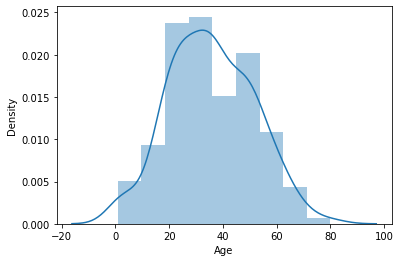

In [34]:
lm = LinearRegression(normalize=True)
lm = lm.fit(df_listwise[['Pclass']], df_listwise['Age'])
df_lr_age = df.copy()
df_lr_age['Age_lm'] = lm.predict(df[['Pclass']])
print('Age average without prediction:', round(df['Age'].mean()))
sns.distplot(df['Age']) 

Age after prediction: 35.87
y_hat = 45.51 + -8.09x


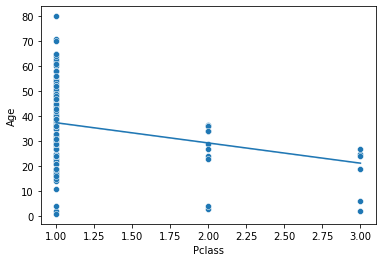

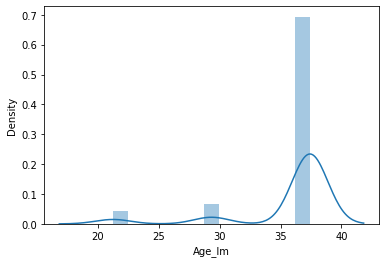

In [35]:
print('Age after prediction:', round(df_lr_age['Age_lm'].mean(),2))
print('y_hat = ', round(lm.intercept_,2), ' + ', round(lm.coef_[0],2), 'x', sep = '')
sns.scatterplot(x = df['Pclass'], y = df['Age'])
sns.lineplot(x = df['Pclass'], y = lm.intercept_ + (lm.coef_ * df['Pclass']))
plt.ylabel('Age')
plt.show()
sns.distplot(df_lr_age['Age_lm'])
plt.show()

### SibSp

Average siblings without prediction: 0


<AxesSubplot:xlabel='SibSp', ylabel='Density'>

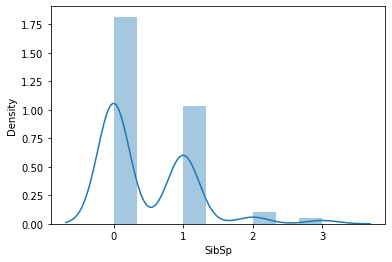

In [37]:
lm = LinearRegression(normalize=True)
lm = lm.fit(df_listwise[['Pclass']], df_listwise['SibSp'])
df_lr_SibSp = df.copy()
df_lr_SibSp['SibSp_lm'] = lm.predict(df[['Pclass']])
df_lr_SibSp['SibSp_lm'] = np.where(df_lr_SibSp['SibSp_lm'] < 0, 0, df_lr_SibSp['SibSp_lm'])
print('Average siblings without prediction:', round(df['SibSp'].mean()))
sns.distplot(df['SibSp']) 

Siblings / Spouses after prediction: 0.44
y_hat = 0.82 + -0.33x


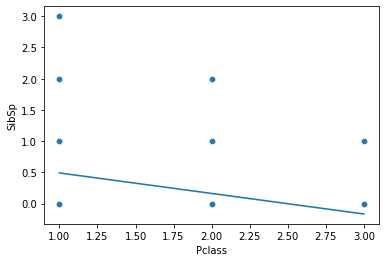

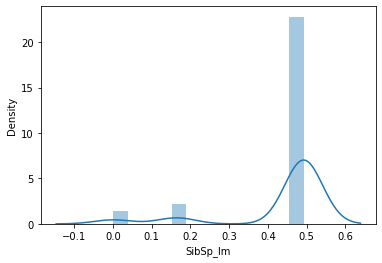

In [38]:
print('Siblings / Spouses after prediction:', round(df_lr_SibSp['SibSp_lm'].mean(),2))
print('y_hat = ', round(lm.intercept_,2), ' + ', round(lm.coef_[0],2), 'x', sep = '')
sns.scatterplot(x = df['Pclass'], y = df['SibSp'])
sns.lineplot(x = df['Pclass'], y = lm.intercept_ + (lm.coef_ * df['Pclass']))
plt.ylabel('SibSp')
plt.show()
sns.distplot(df_lr_SibSp['SibSp_lm'])
plt.show()

### Parch

Average parents/children without prediction: 0


<AxesSubplot:xlabel='Parch', ylabel='Density'>

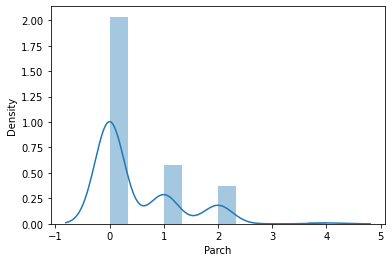

In [40]:
lm = LinearRegression(normalize=True)
lm = lm.fit(df_listwise[['Pclass']], df_listwise['Parch'])
df_lr_Parch = df.copy()
df_lr_Parch['Parch_lm'] = lm.predict(df[['Pclass']])
print('Average parents/children without prediction:', round(df['Parch'].mean()))
sns.distplot(df['Parch']) 

# of Parents/Children after prediction: 0.48
y_hat = 0.35 + 0.11x


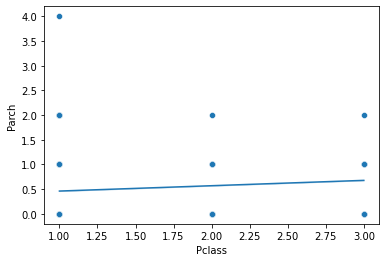

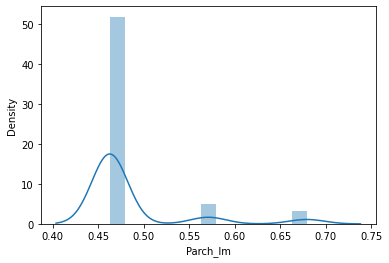

In [41]:
print('# of Parents/Children after prediction:', round(df_lr_Parch['Parch_lm'].mean(),2))
print('y_hat = ', round(lm.intercept_,2), ' + ', round(lm.coef_[0],2), 'x', sep = '')
sns.scatterplot(x = df['Pclass'], y = df['Parch'])
sns.lineplot(x = df['Pclass'], y = lm.intercept_ + (lm.coef_ * df['Pclass']))
plt.ylabel('Parch')
plt.show()
sns.distplot(df_lr_Parch['Parch_lm'])
plt.show()

# Outliers

## Standard Deviation and Percentile Approach

### Age

In [42]:
f = 2
xl = df['Age'].mean() - (df['Age'].std() * f)
xu = df['Age'].mean() + (df['Age'].std() * f)
print('Lower value:', xl)
print('Upper value:', xu)
df['Age_sd'] = np.where(
    df['Age']<xl,
    xl,
    np.where(
        df['Age']>xu,
        xu,
        df['Age']
    )
)
pl = np.nanpercentile(df['Age'], 5)
pu = np.nanpercentile(df['Age'], 95)
df['Age_pct'] = np.where(
    df['Age']<pl,
    pl,
    np.where(
        df['Age']>pu,
        pu,
        df['Age']
    )
)
df[['Age', 'Age_sd', 'Age_pct']].describe()

Lower value: 4.410816187965786
Upper value: 66.97424710317347


,Age,Age_sd,Age_pct
count,158.000000,158.000000,158.000000
mean,35.692532,35.632200,35.848734
std,15.640858,15.199386,14.078677
min,0.920000,4.410816,13.550000
25%,24.000000,24.000000,24.000000
50%,35.500000,35.500000,35.500000
75%,48.000000,48.000000,48.000000
max,80.000000,66.974247,61.150000


<AxesSubplot:xlabel='PassengerId', ylabel='Age'>

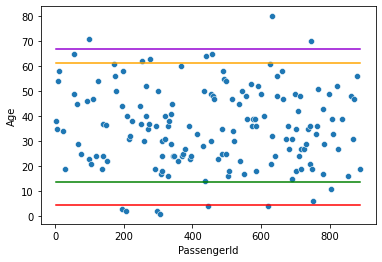

In [43]:
sns.scatterplot(x = df['PassengerId'], y = df['Age'])
sns.lineplot(x = df['PassengerId'], y = pl, color = 'green')
sns.lineplot(x = df['PassengerId'], y = pu, color = 'orange')
sns.lineplot(x = df['PassengerId'], y = xl, color = 'red')
sns.lineplot(x = df['PassengerId'], y = xu, color = 'darkviolet')

### SipSp

In [44]:
f = 2
xl = df['SibSp'].mean() - (df['SibSp'].std() * f)
xu = df['SibSp'].mean() + (df['SibSp'].std() * f)
print('Lower value:', xl)
print('Upper value:', xu)
df['SibSp_sd'] = np.where(
    df['SibSp']<xl,
    xl,
    np.where(
        df['SibSp']>xu,
        xu,
        df['SibSp']
    )
)
pl = np.nanpercentile(df['SibSp'], 5)
pu = np.nanpercentile(df['SibSp'], 95)
df['SibSp_pct'] = np.where(
    df['SibSp']<pl,
    pl,
    np.where(
        df['SibSp']>pu,
        pu,
        df['SibSp']
    )
)
df[['SibSp', 'SibSp_sd', 'SibSp_pct']].describe()

Lower value: -0.8311328579137273
Upper value: 1.7533550801359494


,SibSp,SibSp_sd,SibSp_pct
count,180.000000,180.000000,180.000000
mean,0.461111,0.432112,0.396944
std,0.646122,0.559621,0.493312
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000
max,3.000000,1.753355,1.050000


<AxesSubplot:xlabel='PassengerId', ylabel='SibSp'>

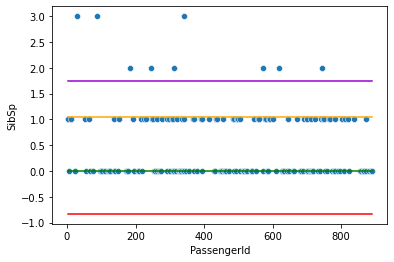

In [45]:
sns.scatterplot(x = df['PassengerId'], y = df['SibSp'])
sns.lineplot(x = df['PassengerId'], y = pl, color = 'green')
sns.lineplot(x = df['PassengerId'], y = pu, color = 'orange')
sns.lineplot(x = df['PassengerId'], y = xl, color = 'red')
sns.lineplot(x = df['PassengerId'], y = xu, color = 'darkviolet')

### Parch

In [46]:
f = 2
xl = df['Parch'].mean() - (df['Parch'].std() * f)
xu = df['Parch'].mean() + (df['Parch'].std() * f)
print('Lower value:', xl)
print('Upper value:', xu)
df['Parch_sd'] = np.where(
    df['Parch']<xl,
    xl,
    np.where(
        df['Parch']>xu,
        xu,
        df['Parch']
    )
)
pl = np.nanpercentile(df['Parch'], 5)
pu = np.nanpercentile(df['Parch'], 95)
df['Parch_pct'] = np.where(
    df['Parch']<pl,
    pl,
    np.where(
        df['Parch']>pu,
        pu,
        df['Parch']
    )
)
df[['Parch', 'Parch_sd', 'Parch_pct']].describe()

Lower value: -1.0448816421007692
Upper value: 1.9688582502879037


,Parch,Parch_sd,Parch_pct
count,171.000000,171.000000,171.000000
mean,0.461988,0.446286,0.450292
std,0.753435,0.703866,0.712607
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000
max,4.000000,1.968858,2.000000


<AxesSubplot:xlabel='PassengerId', ylabel='Parch'>

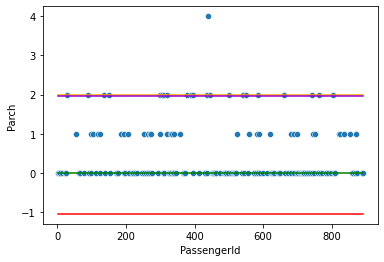

In [47]:
sns.scatterplot(x = df['PassengerId'], y = df['Parch'])
sns.lineplot(x = df['PassengerId'], y = pl, color = 'green')
sns.lineplot(x = df['PassengerId'], y = pu, color = 'orange')
sns.lineplot(x = df['PassengerId'], y = xl, color = 'red')
sns.lineplot(x = df['PassengerId'], y = xu, color = 'darkviolet')

### Fare

In [48]:
f = 2
xl = df['Fare'].mean() - (df['Fare'].std() * f)
xu = df['Fare'].mean() + (df['Fare'].std() * f)
print('Lower value:', xl)
print('Upper value:', xu)
df['Fare_sd'] = np.where(
    df['Fare']<xl,
    xl,
    np.where(
        df['Fare']>xu,
        xu,
        df['Fare']
    )
)
pl = np.nanpercentile(df['Fare'], 5)
pu = np.nanpercentile(df['Fare'], 95)
df['Fare_pct'] = np.where(
    df['Fare']<pl,
    pl,
    np.where(
        df['Fare']>pu,
        pu,
        df['Fare']
    )
)
df[['Fare', 'Fare_sd', 'Fare_pct']].describe()

Lower value: -75.09346543091223
Upper value: 233.01184714519795


,Fare,Fare_sd,Fare_pct
count,175.000000,175.000000,175.000000
mean,78.959191,74.580154,75.607665
std,77.026328,60.224965,62.250726
min,0.000000,0.000000,10.500000
25%,29.700000,29.700000,29.700000
50%,56.929200,56.929200,56.929200
75%,90.539600,90.539600,90.539600
max,512.329200,233.011847,247.520800


<AxesSubplot:xlabel='PassengerId', ylabel='Fare'>

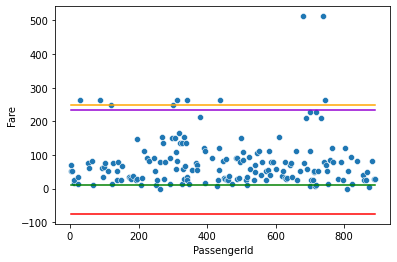

In [49]:
sns.scatterplot(x = df['PassengerId'], y = df['Fare'])
sns.lineplot(x = df['PassengerId'], y = pl, color = 'green')
sns.lineplot(x = df['PassengerId'], y = pu, color = 'orange')
sns.lineplot(x = df['PassengerId'], y = xl, color = 'red')
sns.lineplot(x = df['PassengerId'], y = xu, color = 'darkviolet')

In [50]:
df_correct = pd.read_csv('titanic.csv')

## Sex

In [51]:
df_sex_comparison = pd.concat([df_correct['Sex'], df_sex_new['Sex_Result_New']],axis = 1)
df_sex_comparison['Count'] = np.where(df_correct['Sex'] == df_sex_new['Sex_Result_New'], 1, 0)
result = (df_sex_comparison['Count'].sum()/len(df_sex_comparison.index))
print('El {:.0%} de los datos hicieron match.'.format(result))

El 91% de los datos hicieron match.


Dado a que es una variable categórica, la imputación sectorizada es el método más apropiado para aplicarle a esta columna.

## Age

## Nota
Los valores de los resultados más cercanos a 1 son los mejores.

<AxesSubplot:xlabel='Age', ylabel='Count'>

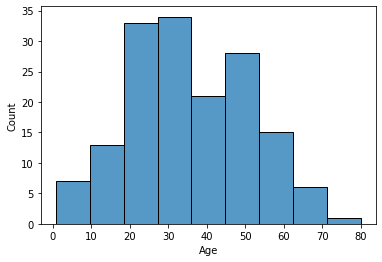

In [56]:
df_Age_Comparison = pd.concat([df_correct['Age'], df_mean['Age'].apply(np.floor), df_median['Age'], df_mode['Age'], df_ages_new['Age_Result_New'] , df_lr_age['Age_lm'].apply(np.floor)],axis = 1)
df_Age_Comparison.set_axis(["Correct", "Mean", "Median", "Mode", "Sect_Imp", "LR"], axis = 1, inplace = True)
sns.histplot(df['Age']) 

In [57]:
models_scores = {
"score_MeanModel" : [round(explained_variance_score(df_Age_Comparison['Correct'], df_Age_Comparison['Mean']),3)], 
"score_MedianModel" : [round(explained_variance_score(df_Age_Comparison['Correct'], df_Age_Comparison['Median']),3)],
"score_ModeModel" : [round(explained_variance_score(df_Age_Comparison['Correct'], df_Age_Comparison['Mode']),3)],
"score_SectImpModel" : [round(explained_variance_score(df_Age_Comparison['Correct'], df_Age_Comparison['Sect_Imp']),3)],
"score_LRModel" : [round(explained_variance_score(df_Age_Comparison['Correct'], df_Age_Comparison['LR']),3)]
}
sorted(models_scores.items(), key=lambda x:x[1], reverse = True)

[('score_SectImpModel', [0.864]),
 ('score_MeanModel', [0.862]),
 ('score_MedianModel', [0.862]),
 ('score_ModeModel', [0.798]),
 ('score_LRModel', [0.092])]

En este caso el mejor modelo fue por imputación sectorizada. La columna de **edad** tiene una distribución normal aunque tiene un poco de sesgo por algunos valores altos. De manera alternativa se podría haber usado la Mediana como reemplazo de los NA's por el poco sesgo que producen los valores altos. La Media podría haber sido útil ya que tuvo el mismo score que Mediana y casi igual a la imputación sectorizada.

### Sibsp

<AxesSubplot:xlabel='SibSp', ylabel='Count'>

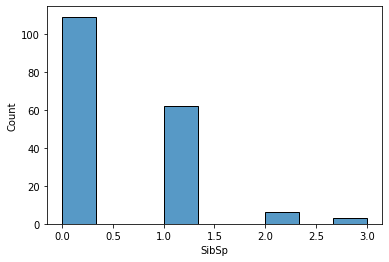

In [58]:
df_SibSp_Comparison = pd.concat([df_correct['SibSp'], df_mean['SibSp'], df_median['SibSp'], df_mode['SibSp'], df_SibSp_new['SibSp_Result_New'] , df_lr_SibSp['SibSp_lm'].apply(np.floor)], axis = 1, ignore_index = True)
df_SibSp_Comparison.set_axis(["Correct", "Mean", "Median", "Mode", "Sect_Imp", "LR"], axis = 1, inplace = True)
df_SibSp_Comparison['Mean'] = np.where(df_SibSp_Comparison['Mean'].isna(), 0 , df_SibSp_Comparison['Mean'] )
df_SibSp_Comparison['Median'] = np.where(df_SibSp_Comparison['Median'].isna(), 0 , df_SibSp_Comparison['Median'] )
df_SibSp_Comparison['Mode'] = np.where(df_SibSp_Comparison['Mode'].isna(), 0 , df_SibSp_Comparison['Mode'] )
sns.histplot(df['SibSp']) 

In [59]:
models_scores = {
"score_MeanModel" : [round(explained_variance_score(df_SibSp_Comparison['Correct'], df_SibSp_Comparison['Mean']),3)], 
"score_MedianModel" : [round(explained_variance_score(df_SibSp_Comparison['Correct'], df_SibSp_Comparison['Median']),3)],
"score_ModeModel" : [round(explained_variance_score(df_SibSp_Comparison['Correct'], df_SibSp_Comparison['Mode']),3)],
"score_SectImpModel" : [round(explained_variance_score(df_SibSp_Comparison['Correct'], df_SibSp_Comparison['Sect_Imp']),3)],
"score_LRModel" : [round(explained_variance_score(df_SibSp_Comparison['Correct'], df_SibSp_Comparison['LR']),3)]
}
sorted(models_scores.items(), key=lambda x:x[1], reverse = True)

[('score_MeanModel', [0.974]),
 ('score_MedianModel', [0.974]),
 ('score_ModeModel', [0.974]),
 ('score_SectImpModel', [0.974]),
 ('score_LRModel', [0.0])]

Dado a la naturaleza de la variable, la regresión lineal termino siendo el peor modelo ya que previamente se establece que cualquier número decimal se redondee abajo. La columna de **SibSp** no se comporta de manera normal, debería ser apropiado aplicar imputaciones sectorizadas.

### Parch

<AxesSubplot:xlabel='Parch', ylabel='Count'>

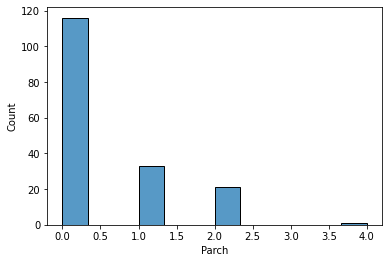

In [60]:
df_Parch_Comparison = pd.concat([df_correct['Parch'], df_mean['Parch'], df_median['Parch'], df_mode['Parch'], df_Parch_new['Parch_Result_New'] , df_lr_Parch['Parch_lm'].apply(np.floor)], axis = 1, ignore_index = True)
df_Parch_Comparison.set_axis(["Correct", "Mean", "Median", "Mode", "Sect_Imp", "LR"], axis = 1, inplace = True)
sns.histplot(df['Parch']) 

In [61]:
models_scores = {
"score_MeanModel" : [round(explained_variance_score(df_Parch_Comparison['Correct'], df_Parch_Comparison['Mean']),3)], 
"score_MedianModel" : [round(explained_variance_score(df_Parch_Comparison['Correct'], df_Parch_Comparison['Median']),3)],
"score_ModeModel" : [round(explained_variance_score(df_Parch_Comparison['Correct'], df_Parch_Comparison['Mode']),3)],
"score_SectImpModel" : [round(explained_variance_score(df_Parch_Comparison['Correct'], df_Parch_Comparison['Sect_Imp']),3)],
"score_LRModel" : [round(explained_variance_score(df_Parch_Comparison['Correct'], df_Parch_Comparison['LR']),3)]
}
sorted(models_scores.items(), key=lambda x:x[1], reverse = True)

[('score_MeanModel', [0.931]),
 ('score_SectImpModel', [0.896]),
 ('score_MedianModel', [0.888]),
 ('score_ModeModel', [0.888]),
 ('score_LRModel', [0.0])]

En teoría, dado por el sesgo de la data de *Parch*,  debería utilizarse el modelo de reemplazo por mediana. Sin embargo, el modelo que salió con mayor puntuación fue el de la media.

### Fare

<AxesSubplot:xlabel='Fare', ylabel='Count'>

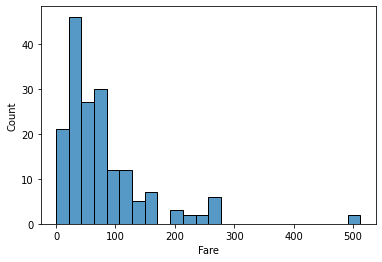

In [62]:
df_Fare_Comparison = pd.concat([df_correct['Fare'], df_mean['Fare'], df_median['Fare'], df_mode['Fare'], df_Fare_new['Fare_Result_New'] , df_lr_Fare['Fare_lm'].apply(np.floor)], axis = 1, ignore_index = True)
df_Fare_Comparison.set_axis(["Correct", "Mean", "Median", "Mode", "Sect_Imp", "LR"], axis = 1, inplace = True)
sns.histplot(df['Fare']) 

In [63]:
models_scores = {
"score_MeanModel" : [round(explained_variance_score(df_Fare_Comparison['Correct'], df_Fare_Comparison['Mean']),3)], 
"score_MedianModel" : [round(explained_variance_score(df_Fare_Comparison['Correct'], df_Fare_Comparison['Median']),3)],
"score_ModeModel" : [round(explained_variance_score(df_Fare_Comparison['Correct'], df_Fare_Comparison['Mode']),3)],
"score_SectImpModel" : [round(explained_variance_score(df_Fare_Comparison['Correct'], df_Fare_Comparison['Sect_Imp']),3)],
"score_LRModel" : [round(explained_variance_score(df_Fare_Comparison['Correct'], df_Fare_Comparison['LR']),3)]
}
sorted(models_scores.items(), key=lambda x:x[1], reverse = True)

[('score_MeanModel', [0.973]),
 ('score_MedianModel', [0.972]),
 ('score_SectImpModel', [0.959]),
 ('score_ModeModel', [0.958]),
 ('score_LRModel', [0.101])]

Podemos observar que la variable de **Fare** tiene mucho sesgo, y a la vez existen varios outliers que afectan el análisis. Por lo mismo en este caso sería prudente ya sea usar el modelo de Mediana por el sesgo que tiene presente. A pesar de esto le ganó el modelo de media por un decimal.

In [64]:
df_Embarked_Comparison = pd.concat([df_correct['Embarked'], df_Embarked_new['Embarked_Result_New']],axis = 1)
df_Embarked_Comparison['Count'] = np.where(df_correct['Embarked'] == df_Embarked_new['Embarked_Result_New'], 1, 0)
result = (df_Embarked_Comparison['Count'].sum()/len(df_Embarked_Comparison.index))
print('El {:.0%} de los datos hicieron match.'.format(result))

El 97% de los datos hicieron match.


Por la naturaleza categórica de **Embarked**, resulta mejor aplicar el método de imputación sectorizada usando el método *ffill*

# Conclusiones

Como vimos anteriormente, no siempre la teoría nos proporciona los mejores resultados en casos reales. Hay que tomar en cuenta el contexto de la data y qué tipo de data estamos procesando, por ejemplo me di cuenta que para reemplazar data ya sea por moda/media/mediana, es preferible trabajar con números continuos como la columan de *Fare*. Para las variables categóricas que se representaban en números aunque salieron con precisión alta con reemplazos de moda/media/mediana, el método apropiado para reemplazo sería entre la *moda* y la imputación sectorizada. Si son pocos los datos faltantes al momento de hacer el análisis de una sola columan como en el caso de *Sibsp*, se puede aplicar el método de listwise deletion, ya que 3 datos faltantes no pueden causar mayor efecto en un dataset de 183 observaciones. Finalmente, vemos que en el caso que existan muchos datos faltantes es crucial el método que se utilice. De no utilizarse el método apropiado, el comportamiento de la data puede cambiar sustancialmente. 

# Parte 2

In [65]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler

In [67]:
data = [df_Age_Comparison['Sect_Imp'], df_SibSp_Comparison['Mean'], df_Parch_Comparison['Mean'], df_Fare_Comparison['Median']]
headers = ('Age', 'Sibsp', 'Parch', 'Fare')
df_final = pd.concat(data, axis = 1, keys = headers)

In [81]:
scaler = StandardScaler()
df_z = df_final.copy()
for col in df_z.select_dtypes(include=['float', 'int']).columns:
    df_z[col+'_z'] = scaler.fit_transform(df_z[[col]])
df_z = df_z.filter(regex='_z',axis=1)

In [72]:
scaler = StandardScaler()
df_MD = df_correct.copy()
for col in df_MD.select_dtypes(include=['float64', 'int64']).columns:
    df_MD[col+'_zReal'] = scaler.fit_transform(df_MD[[col]])
df_MD = df_MD.filter(regex='_z',axis=1)
df_MD = df_MD.drop(['PassengerId_zReal', 'Survived_zReal', 'Pclass_zReal'], axis = 1)
df_MD = pd.concat([df_MD.reset_index(drop=True), df_z.reset_index(drop=True)], axis=1)
df_MD.describe().apply(lambda s: s.apply(lambda x: format(x, 'g')))

,Age_zReal,SibSp_zReal,Parch_zReal,Fare_zReal,Age_z,Sibsp_z,Parch_z,Fare_z
count,183,183,183,183,183,183,183,183
mean,-1.65017e-16,-1.45603e-17,3.88275e-17,1.14056e-16,0,-1.45603e-17,1.45603e-16,7.76549e-17
std,1.00274,1.00274,1.00274,1.00274,1.00274,1.00274,1.00274,1.00274
min,-2.2277,-0.723044,-0.63173,-1.03341,-2.35487,-0.706799,-0.636189,-1.03659
25%,-0.74831,-0.723044,-0.63173,-0.64333,-0.750084,-0.706799,-0.636189,-0.637879
50%,0.0208687,-0.723044,-0.63173,-0.284775,-0.0354863,-0.706799,-0.636189,-0.279984
75%,0.757998,0.833628,0.697081,0.148643,0.781197,0.851565,0.740879,0.159534
max,2.84119,3.94697,4.68351,5.69546,3.02708,3.96829,4.87208,5.77238


El *StandardScaler* quita la media y escala la data a una varianza unitaria. Es útil en el momento que existe mucha varianza entre los datos y se vuelve más fácil comparar datos con diferentes escalas. Es más efectiva cuando la distribución de los datos tiene una curva tipo campana de Gauss. Los valores más importantes probablemente sean los mínimos y máximos después de estandarizar la data, ya que describen que tan variada es la data en cada columna. Podemos ver que todas se encuentran bastante acertadas, excepto la de *Age* que tiene la diferencia en máximo más pronunciada.  No se puede comparar la media ya que todos en teoría tendrían que estar en o cerca de 0. La desviación estándar debe ser 1 para todos de igual manera.

In [75]:
scaler = MinMaxScaler()
df_norm_NA = df_final.copy()
for col in df_norm_NA.select_dtypes(include=['float', 'int']).columns:
    df_norm_NA[col+'_norm'] = scaler.fit_transform(df_norm_NA[[col]])
df_norm_NA = df_norm_NA.filter(regex='_norm',axis=1)

In [76]:
scaler = MinMaxScaler()
df_norm_correct = df_correct.copy()
for col in df_norm_correct.select_dtypes(include=['float64', 'int64']).columns:
    df_norm_correct[col+'_normReal'] = scaler.fit_transform(df_norm_correct[[col]])
df_norm_correct = df_norm_correct.filter(regex='_norm',axis=1)
df_norm_correct = df_norm_correct.drop(df_norm_correct.columns[[0,1,2]], axis = 1)
df_norm_correct = pd.concat([df_norm_correct.reset_index(drop=True), df_norm_NA.reset_index(drop=True)], axis=1)
df_norm_correct.describe().apply(lambda s: s.apply(lambda x: format(x, 'g')))

,Age_normReal,SibSp_normReal,Parch_normReal,Fare_normReal,Age_norm,Sibsp_norm,Parch_norm,Fare_norm
count,183,183,183,183,183,183,183,183
mean,0.439484,0.154827,0.118852,0.153578,0.43755,0.151184,0.115497,0.152238
std,0.197823,0.21472,0.188654,0.149021,0.186316,0.214486,0.182043,0.147268
min,0,0,0,0,0,0,0,0
25%,0.291856,0,0,0.0579705,0.298179,0,0,0.0585561
50%,0.443601,0,0,0.111257,0.430956,0,0,0.111118
75%,0.589024,0.333333,0.25,0.175668,0.582701,0.333333,0.25,0.175668
max,1,1,1,1,1,1,1,1


*MinMaxScaler* transforma la data de manera que todas las columnas tenga rangos entre 0 y 1. Este trabaja *row-wise* a diferencia del *StandardScaler* que trabaja *column-wise*. Los valores que consideraría importante en este análisis sería la media simplemente para propósitos de ver como se comporta la data. Si miramos la desviación estándar y vemos que hay números más grandes podemos inferir que entonces la data tiene presencia de varios o pocos fuertes *outliers*. Otra vez vemos que la única columna que varía un poco en cuánto a desviaciones estándar es la de *Age* pero es mínimo el cambio. 

In [82]:
scaler = MaxAbsScaler()
df_MAS_NA = df_final.copy()
for col in df_MAS_NA.select_dtypes(include=['float64', 'int64']).columns:
    df_MAS_NA[col+'_MAS'] = scaler.fit_transform(df_MAS_NA[[col]])
df_MAS_NA = df_MAS_NA.filter(regex='_MAS',axis=1)

In [83]:
scaler = MaxAbsScaler()
df_MAS_correct = df_correct.copy()
for col in df_MAS_correct.select_dtypes(include=['float64', 'int64']).columns:
    df_MAS_correct[col+'_MASReal'] = scaler.fit_transform(df_MAS_correct[[col]])
df_MAS_correct = df_MAS_correct.filter(regex='_MAS',axis=1)
df_MAS_correct = df_MAS_correct.drop(df_MAS_correct.columns[[0,1,2]], axis = 1)
df_MAS_correct = pd.concat([df_MAS_correct.reset_index(drop=True), df_MAS_NA.reset_index(drop=True)], axis=1)
df_MAS_correct.describe().apply(lambda s: s.apply(lambda x: format(x, 'g')))

,Age_MASReal,SibSp_MASReal,Parch_MASReal,Fare_MASReal,Age_MAS,Sibsp_MAS,Parch_MAS,Fare_MAS
count,183,183,183,183,183,183,183,183
mean,0.44593,0.154827,0.118852,0.153578,0.444018,0.151184,0.115497,0.152238
std,0.195548,0.21472,0.188654,0.149021,0.184174,0.214486,0.182043,0.147268
min,0.0115,0,0,0,0.0115,0,0,0
25%,0.3,0,0,0.0579705,0.30625,0,0,0.0585561
50%,0.45,0,0,0.111257,0.4375,0,0,0.111118
75%,0.59375,0.333333,0.25,0.175668,0.5875,0.333333,0.25,0.175668
max,1,1,1,1,1,1,1,1


*MaxAbsScaler* es similar al *MinMaxScaler*, sin embargo este transforma todos los valores para que todos sean positivos. El análisis se mantiene bastante similar a la comparación anterior usando el otro scaler. 